<a href="https://colab.research.google.com/github/RitaNegreiros/sensemaking/blob/main/SSC_SIR_Adaptado_Proje%C3%A7ao_DadosColetados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Readme
# os códigos estao organizados na seguinte ordem:
# 01 Experimento 01 Yanomami Reaçoes Facebook ***PENDENTE COPIAR NO COLAB CODIGO RODANDO NO VISUAL STUDIO
# 02 Experimento 01 Yanomami Sensemaking Facebook ***PENDENTE COPIAR NO COLAB CODIGO RODANDO NO VISUAL STUDIO
# 03 Experimento 02 Meteoro Reaçoes Facebook ***PENDENTE COPIAR NO COLAB CODIGO RODANDO NO VISUAL STUDIO
# 04 Experimento 02 Meteoro Sensemaking Facebook ***PENDENTE COPIAR NO COLAB CODIGO RODANDO NO VISUAL STUDIO
# 05 Experimento 02 Meteoro Facebook Projeção Modelo SIR ***PENDENTE COPIAR NO COLAB CODIGO RODANDO NO VISUAL STUDIO
# 06 Experimento 02 Meteoro Reaçoes X (Twitter) Coleta manual ***PENDENTE COPIAR NO COLAB CODIGO RODANDO NO VISUAL STUDIO
# 07 Experimento 02 Meteoro Sensemaking X (Twitter) Coleta manual ***PENDENTE COPIAR NO COLAB CODIGO RODANDO NO VISUAL STUDIO
# 08 Experimento 02 Meteoro X (Twitter) Coleta manual Projeção Modelo SIR ***Antes da Qualificacao
# 09 Experimento 03 API Youtube Dia 1 Projeção Modelo SI/SIR *CRIADO ANTES DA DEFINICAO DO SIR ADDAPTADO
# 10 Experimento 04 API Youtube Dia 1 Projeção Modelo SIR Adaptado SSC
# 11 Experimento 04 API Youtube Dia 1 Modelo SIR Adaptado SSC Retorna as taxas Beta;Gamma;Delta ***Planilha pode ser usada com informacoes de outra midia
# 12 Experimento 04 API Youtube Dia 1 Modelo SIR Retorna as taxas Beta;Gamma ***Planilha pode ser usada com informacoes de outra midia
# Tentantivas anteriores
#     Modelo SIR Fixo
#     Tentativa modelo SIR Adaptado Fixo
#     Exemplo OLD SIR fixo
#     Exemplo OLD SIRD fixo


In [2]:
# 08 Experimento 02 Meteoro X (Twitter) Coleta manual Projeção Modelo SIR
# 08_Exp_02_Meteoro_X_Twitter_Projeção_SIR_Pt_Fig_08
#pacotes necessário para análise

from scipy.integrate import odeint
import numpy as np
import plotly.graph_objects as go
import numpy as np #para algum cálculo. Você pode querer usar seu módulo favorito para isso, como estatísticas

#Parâmetros para gerar a solução:
# **NOVA MENSAGEM TWITTER E CROWNDTANGLE
# https://twitter.com/GloboNews/status/1753237488687026336?s=20
# GloboNews
# A Nasa informou que um asteroide quase do tamanho do est dio do Maracan  est  se aproximando da Terra.
# Ele foi classificado pela Ag ncia Espacial americana como potencialmente perigoso.

N = 8817    # população total
i0 = 61       # número inicial de infectados
r0 = 12         # número inicial de recuperados
s0 = N - i0 - r0

#gera um vetor (0,1,2,3..,179) que representa o valores de t usados para gerar a solução.
t = np.arange(start=1, stop=31, step=1)

beta = 247 / (8 * 100)
# Achar taxa de contaminação beta
# Quantidade de infectados no útimo dia (247 likes e compartilhamntos)/ (quantidade de dias   8 X 100)


gama = 49 / (8 * 100)
# Achar taxa de recuperação gama
# Quantidade de recuperados no útimo dia (49 comentários)/ (quantidade de dias 8 X 100)

#Solução numérica do modelo SIR
def SIR(t,beta,gama,N, i0,r0):
    def dotSIR(y,t,beta,gama,N): # função que define o sistema de EDO's
      S,I,R = y # # y é o vetor com as 3 equações S,I,R

      #Formular matemática do SIR em :  https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
      # Aqui as equações em Python:
      #vetor em que cada elemento é uma das equações
      dydt = [
         -beta*S*I/N,
         beta*S*I/N - gama*I,
         gama*I
         ]

      return dydt

    y0 = [s0,i0,r0] #vetor que armazena as condições iniciais do sistema


    #O comando responsável por encontrar a solução numérica é o odeint
    # O comando retorna uma matriz com as colunas determinadas pelo número de equações, nesse caso 3
    # e com o número de linhas referentes ao intervalo de tempo considerado.
    sol = odeint(dotSIR, y0,t, args=(beta,gama,N))


    # a primeira coluna da matriz sol é referente aos Suscetíves, que é a primeira equação do sistema.
    S = sol[:,0]

    # a segunda coluna da matriz é referente aos Infectados, que é a segunda equação do sistema.
    I = sol[:,1]

    # a terceira coluna da matriz é referente aos Recuperados, que é a terceira equação do sistema.
    R = sol[:,2]

    #variável que armazena a soma dos Infectados + Recuperados com o tempo para podermos analisar o
    #valor acumulado de pessoas infectadas no decorrer do tempo
    C = sol[:, 1] + sol[:,2]

    return S,I,R,C

#variável que armazenará S,I,R,C que são os valores retornados pela função SIR,
solucao = SIR(t,beta,gama,N, i0,r0)
#como a função retorna um array com cada elemento sendo S,I,R,C para analisar cada solução separadamente
#vamos definir as seguintes variáveis
S = solucao[0]  #Suscetíves
I = solucao[1]  #Infectados
R = solucao[2]  #Recuperados
C = solucao[3]  #Casos Acumulados
infectInt = I.astype('int32')

#cada uma das variáveis trace abaixo armazena o conjunto de pontos gerada pela função SIR que queremos plotar.
#Veja que como queremos plotar 4 conjuntos de dados diferentes S,I,R,C armazenamos cada um deles em uma varíavel.
trace1 = go.Scatter(x=t, y=S, mode='lines', name='Suscetível', line_shape='spline')
trace2 = go.Scatter(x=t, y=I, mode='lines+markers+text', name='Infectado', line_shape='spline', text=infectInt)
trace3 = go.Scatter(x=t, y=R, mode='lines', name='Recuperado', line_shape='spline')
trace4 = go.Scatter(x=t, y=C, mode='lines', name='Casos acumulados', line_shape='spline')

layout = go.Layout(
    title={
        'text': '<b>SIR MODEL</b>   -   Twitter mensagem sobre o Meteoro' +
                '              ' + 'Beta = ' + str(beta) + '   Gama = ' + str(gama),
        'font': {'family': 'Arial', 'size': 20, 'color': '#7f7f7f'}
    },
    xaxis={'title': 'Dias', 'tickfont': {'family': 'Arial', 'size': 20, 'color': '#7f7f7f'}},
    yaxis={'title': 'População', 'tickfont': {'family': 'Arial', 'size': 20, 'color': '#7f7f7f'}}
)

data = [trace1, trace2, trace3, trace4]

fig = go.Figure(data, layout=layout)
fig.update_traces(textposition="bottom right")

fig.update_layout(
    legend_orientation="h",
    legend=dict(y=-0.30),
    font=dict(size=8)
)

fig.show() #mostra a figura


In [4]:
# 09 Experimento 03 API Youtube Dia 1 Projeção Modelo SI/SIR

# 09 You tube dia 1 projeção SI / SIR
# Projeto-SIR-App-X - v3/apiYouTube.py

import json
from scipy.integrate import odeint
import numpy as np
import plotly.graph_objects as go

newTimesteps = []
newRecovered = []
newSusceptible = []
newInfectious = []
newSymptomaticContaminated = []
newAsymptContaminated = []
newInfectiousAgent = []

initialSusceptible: int = 0
gammaRate:float = 0.0
betaRate:float = 0.0

infectName = ""
symptName = ""
infectAgentName = ""


def carregar_json(caminho_arquivo):

    try:
        with open(caminho_arquivo, "r", encoding="utf-8") as arquivo:
            dados = json.load(arquivo)  # Converte o conteúdo do arquivo para um objeto Python
            return dados
    except FileNotFoundError:
        print(f"Error: The file '{caminho_arquivo}' not found.")
    except json.JSONDecodeError:
        print(f"Erro: The file '{caminho_arquivo}' does not contain a valid JSON.")

#Projeto-SIR-App-X - v3/HN21Fs3_0UM_estatistica.json

apiObject = carregar_json("/content/HN21Fs3_0UM_estatistica.json")

def getViews():
    return int(apiObject["statistics"]["items"][0]["statistics"]["viewCount"])

def getLikes():
    return int(apiObject["statistics"]["items"][0]["statistics"]["likeCount"])

def getComments():
    return int(apiObject["statistics"]["items"][0]["statistics"]["commentCount"])

def getTopComments():
    comments = apiObject["comments"]["items"]
    textComments = list(map(lambda comment: comment["snippet"]["topLevelComment"]["snippet"]["textOriginal"],comments))
    return textComments

def getBetaRate(S0, I0, I1, N, t):
    print("\nChoose an option:")
    print("1 - Calculate the approximate beta rate")
    print("2 - Enter the beta rate manually")

    chooseRateMode = int(input("\nEnter your choice (1 or 2): "))

    if chooseRateMode == 1:

        if I1 <= I0:
            raise ValueError("The number of infected I1 must be greater than I0.")

        beta = (np.log(I1 / I0) * N) / (S0 * t )
    else:
        beta =float(input("Beta rate:"))


    return beta

def getGammaRate(delta_R, I0, I1, delta_t):

    print("\nChoose an option:")
    print("1 - Calculate approximate gamma rate")
    print("2 - Enter the gamma rate manually")

    chooseRateMode = int(input("\nEnter your choice (1 or 2): "))

    if chooseRateMode == 1:
        I_mean = (I0 + I1) / 2

        # Calculates the recovery rate
        gamma = delta_R / (I_mean * delta_t)
    else:
        gamma =  float(input("\nEnter gamma rate: "))

    return gamma

def SIR(t,beta,gamma,N, i0,r0):
    def dotSIR(y,t,beta,gama,N):
      S,I,R = y
      dydt = [
         -beta*S*I/N,
         beta*S*I/N - gama*I,
         gama*I
         ]

      return dydt

    s0 = N - i0 - r0
    y0 = [s0,i0,r0]
    sol = odeint(dotSIR, y0,t, args=(beta,gamma,N))

    S = sol[:,0]
    I = sol[:,1]
    R = sol[:,2]

    return S,I,R

def generateSirCharts(colecDays:int):

    delta_R = newRecovered[-2]
    i0 = 1
    i1 = newRecovered[-2] + newInfectious[-2]
    gammaRate = getGammaRate(delta_R, i0, i1, colecDays)
    s0 = newSusceptible[-1]
    N = newSusceptible[-1] + 1
    betaRate = getBetaRate(s0,i0,i1,N,colecDays)

    timeCount = len(newTimesteps) + 1
    t = np.arange(start=0, stop=timeCount , step=1)
    r0 = 0

    S,I,R = SIR(t,betaRate,gammaRate,N, i0,r0)

    infectIntSir = I.astype('int32')
    suscepIntSir = S.astype('int32')
    recoveredIntSir = R.astype('int32')

    # SIR - MAKE CHART
    trace1Sir = go.Scatter(
        x=t,
        y=S,
        mode='lines+markers+text',
        name='Susceptible',
        line=dict(color='blue', width=1),
        line_shape='spline',
        text=suscepIntSir,
        textposition='top center',
        textfont=dict(
            size=8,
            color='blue'
        )
    )

    trace2Sir = go.Scatter(
        x=t,
        y=I,
        mode='lines+markers+text',
        name= f"Infected ({infectName})",
        line_shape='spline',
        text= infectIntSir,
        textposition='bottom center',
        textfont=dict(
            size=8,
            color='red'
            )
    )

    trace3Sir = go.Scatter(
        x=t,
        y=R,
        mode='lines+markers+text',
        name= f"Recovered",
        text=recoveredIntSir,
        textposition='bottom center',
            textfont=dict(
            size=8,
            color='green'
            ),
        line=dict(color='green', width=1),
        line_shape='spline',
    )

    dataSir=[trace1Sir,trace2Sir,trace3Sir]

    figSir = go.Figure(dataSir)

    figSir.update_layout(
        title = '<b>SIR MODEL</b> - Projection: '+ ' Gamma(recovery)=' +
        str(round(gammaRate, 4)) + ', Beta (transmission)=' + str(round(betaRate, 4)) +
        ',  Population=' + str(N),
        legend_orientation="h",
        legend=dict(
            y=-0.30
            ),
        font=dict(
            size=14,
        ))

    figSir.write_image("chart_SIR_project.png", width=1200, height=800, scale=2)
    figSir.show()

def generateInfectCharts():
    # INFECTED CHART:
    trace2 = go.Scatter(
    x=newTimesteps,
    y=newAsymptContaminated,
    mode='lines+markers',
    name=f"A -> Asymptomatic" ,
    line=dict(color='blue', width=1),
    line_shape='spline',
    marker=dict(color="blue")
    )

    array_numpy_asympt = np.array(newAsymptContaminated)
    asymptInt = array_numpy_asympt.astype('int32')

    trace2_texts = go.Scatter(
            x=newTimesteps,
            y=newAsymptContaminated,
            mode="text",
            text= asymptInt,
            textposition="bottom right",
            textfont=dict(
                size=8,
                color="blue",
            ),
            showlegend=False,
        )

    trace3 = go.Scatter(
    x=newTimesteps,
    y=newSymptomaticContaminated,
    mode='lines+markers',
    name=f"S -> Symptomatic ({symptName})" ,
    line=dict(color='purple', width=1),
    line_shape='spline',
    marker=dict(color="purple")
    )

    array_numpy_sympt = np.array(newSymptomaticContaminated)
    symptInt = array_numpy_sympt.astype('int32')

    trace3_texts = go.Scatter(
            x=newTimesteps,
            y=newSymptomaticContaminated,
            mode="text",
            text= symptInt,
            textposition="bottom right",
            textfont=dict(
                size=8,
                color="purple",
            ),
            showlegend=False,
        )

    trace4 = go.Scatter(
    x=newTimesteps,
    y=newInfectiousAgent,
    mode='lines+markers',
    name=f"II -> infectious Agent ({infectAgentName})" ,
    line=dict(color='red', width=1),
    line_shape='spline',
    marker=dict(color="red")
    )

    array_numpy_sympt_agent = np.array(newInfectiousAgent)
    symptAgentInt = array_numpy_sympt_agent.astype('int32')

    trace4_texts = go.Scatter(
            x=newTimesteps,
            y=newInfectiousAgent,
            mode="text",
            text= symptAgentInt,
            textposition="top center",
            textfont=dict(
                size=8,
                color="red",
            ),
            showlegend=False,
        )

    data=[trace2, trace2_texts, trace3, trace3_texts, trace4, trace4_texts]
    fig1 = go.Figure(data)

    fig1.update_layout(
        title={
            "text": "<b>Infected chart</b>",
            "font": {'family': 'Arial', 'size': 24, 'color': 'red'}
        },
        legend_orientation="h",
        legend=dict(y=-0.30, x=0, orientation="v"),
        font=dict(size=18, color="gray"),
        xaxis=dict(tickangle=-45 )
    )
    fig1.show()


def calcular_si(S0, I0, beta, N, t_max, dt):
    def dotSI(y, t, beta, N):
        S, I = y
        dS_dt = -beta * S * I / N
        dI_dt = beta * S * I / N
        return [dS_dt, dI_dt]

    t = np.arange(0, t_max + dt, dt)
    y0 = [S0, I0]
    sol = odeint(dotSI, y0, t, args=(beta, N))
    S = sol[:, 0]
    I = sol[:, 1]

    return t, S, I

def plot_si(t, S, I, N):

    infectIntSir = I.astype('int32')
    suscepIntSir = S.astype('int32')

    # SI - MAKE CHART
    trace1Si = go.Scatter(
        x=t,
        y=S,
        mode='lines+markers+text',
        name=f'Susceptible',
        line=dict(color='blue', width=1),
        line_shape='spline',
        text=suscepIntSir,
        textposition='top center',
        textfont=dict(
            size=8,
            color='blue'
        )
    )

    trace2Si = go.Scatter(
        x=t,
        y=I,
        mode='lines+markers+text',
        name= f"Infected ({infectName})",
        line_shape='spline',
        text= infectIntSir,
        textposition='bottom center',
        textfont=dict(
            size=8,
            color='red'
            )
    )

    dataSir=[trace1Si,trace2Si]

    figSir = go.Figure(dataSir)

    figSir.update_layout(
        title = '<b>SI MODEL</b> - Projection ->  Beta(Transmission rate)=' + str(betaRate) +
        ',  Population=' + str(N),
        legend_orientation="h",
        template="plotly_white",
        legend=dict(
            y=-0.30
            ),
        font=dict(
            size=14,
        ))

    figSir.show()



def generateSiChart(days: int, colecDays: int, infec: int, suscep: int):
    global betaRate
    I1 = infec
    N = suscep + 1
    S0 = suscep
    I0 = 1
    betaRate = getBetaRate(S0, I0, I1, N, colecDays)
    t_max = days
    dt = 1
    t, S, I = calcular_si(S0, I0, betaRate, N, t_max, dt)

    plot_si(t, S, I, N)


def runScript():
    global newTimesteps
    global newRecovered
    global newInfectious
    global newSusceptible
    global initialSusceptible
    global newAsymptContaminated
    global newSymptomaticContaminated
    global newInfectiousAgent
    global infectName
    global symptName
    global infectAgentName

    print(f"\nviews: {getViews()}")
    print(f"comments: {getComments()}")
    print(f"top comments: {len(getTopComments())}")
    print(f"likes: {getLikes()}\n")

    choose = int(input("Choose your model\n SIR - Enter 1 \n SI - Enter 2\n"))

    print("Enter the correct parameter option: \n1 - views \n2 - Likes \n3 - Comments \n4 - Top Comments")
    infectious = int(input("Option for Infected: "))
    symptomaticContaminated = int(input("Symptomatic contaminated option: "))
    infectiousAgent = int(input("Infectious agent option: "))

    if infectious == 1:
        infectious = getViews()
        infectName = "views"
    elif infectious == 2:
        infectious = getLikes()
        infectName = "likes"
    elif infectious == 3:
        infectious = getComments()
        infectName = "comments"
    elif recover == 4:
        recover = len(getTopComments)
        infectName = "top comments"
    else:
        print(" Invalid option")

    if symptomaticContaminated == 1:
        symptomaticContaminated = getViews()
        symptName = "views"
    elif symptomaticContaminated == 2:
        symptomaticContaminated = getLikes()
        symptName = "likes"
    elif symptomaticContaminated == 3:
        symptomaticContaminated = getComments()
        symptName = "comments"
    elif symptomaticContaminated == 4:
        symptomaticContaminated = len(getTopComments())
        symptName = "top comments"
    else:
        print(" Invalid option")


    if infectiousAgent == 1:
        infectiousAgent = getViews()
        infectAgentName = "views"
    elif infectiousAgent == 2:
        infectiousAgent = getLikes()
        infectAgentName = "likes"

    elif infectiousAgent == 3:
        infectiousAgent = getComments()
        infectAgentName = "comments"
    elif infectiousAgent == 4:
        infectiousAgent = len(getTopComments())
        infectAgentName = "top comments"
    else:
        print(" Invalid option")

    numDays = int(input("Number of days for the projection: "))
    colectDataDays = int(input("Number of days of data collection: "))

    for i in range(numDays):
        newTimesteps.append(i)

    newInfectious.append(infectious)
    newInfectious.append(0)

    newAsymptContaminated.append(0)
    newAsymptContaminated.append(infectious - symptomaticContaminated)

    newSymptomaticContaminated.append(0)
    newSymptomaticContaminated.append(symptomaticContaminated)

    newInfectiousAgent.append(0)
    newInfectiousAgent.append(infectiousAgent)

    initialSusceptible = int(input("Number of susceptible: "))

    if choose == 1:
        recover = int(input("Recovered option: "))
        if recover == 1:
            recover = getViews()
        elif recover == 2:
            recover = getLikes()
        elif recover == 3:
            recover = getComments()
        elif recover == 4:
            recover = len(getTopComments())
        else:
            print(" Invalid option")

        newSusceptible.append(initialSusceptible - infectious - recover)
        newSusceptible.append(initialSusceptible)

        newRecovered.append(recover)
        newRecovered.append(0)

        generateInfectCharts()
        generateSirCharts(colectDataDays)

    else:
        newSusceptible.append(initialSusceptible - infectious)
        newSusceptible.append(initialSusceptible)
        generateInfectCharts()
        generateSiChart(days=numDays, colecDays=colectDataDays, infec=infectious,suscep=initialSusceptible)


runScript()


views: 188416
comments: 38
top comments: 31
likes: 967

Choose your model
 SIR - Enter 1 
 SI - Enter 2
2
Enter the correct parameter option: 
1 - views 
2 - Likes 
3 - Comments 
4 - Top Comments
Option for Infected: 1
Symptomatic contaminated option: 2
Infectious agent option: 3
Number of days for the projection: 7
Number of days of data collection: 2
Number of susceptible: 1670000



Choose an option:
1 - Calculate the approximate beta rate
2 - Enter the beta rate manually


KeyboardInterrupt: Interrupted by user

In [ ]:
# 10_ssc_projecao_entrada_manual.py
# "SSC_SIR Adaptado_Projeçao.ipynb"
# rascunho da sugestao de modelo SIR adaptado
# onde considerariamos algumas pessoas susceptíveis (S) nunca são infectadas,
# mas migram diretamente para os recuperados (R) — como se fossem naturalmente resistentes ou imunizadas espontaneamente.
# Para isso, adicionamos uma nova taxa, digamos ßr (ou delta), que representa a taxa de migração direta de S para R sem passar por I (conceitualmente Influenciados).
# Como ficaria uma nova Fórmula Matemática do Modelo Modificado (SIR com Resistentes/Imunes)
# dS/dt = -ß * S * I - ßr * S
# dI/dt = ß * S * I - gamma * I
# dR/dt = gamma * I + ßr * S
# Explicação das mudanças:
# ß: taxa de transmissão normal (S -> I)
# gamma: taxa de recuperação (I -> R)
# ßr ou delta: nova taxa de resistência direta (S -> R, sem infecção)
# Isso poderia modelar, por exemplo, indivíduos vacinados, imunologicamente resistentes,
# ou protegidos por algum outro fator antes do contato com o vírus.
# pensando em midia social o que pensamos sobre o usuario que critica a mensagem e nao se influenciou por ela.


from scipy.integrate import odeint
import numpy as np
import plotly.graph_objects as go

newRecovered = []
newSusceptible = []
newInfectious = []

N = 0
S0: int = 0
I0: int = 1
I1: int = 1
R0: int = 0
R1: int = 0

gammaRate:float = 0.0
betaRateInf:float = 0.0
betaRateResist:float = 0.0
numDays = 7


def runScript():
    global N, S0, I1, R1, gammaRate, betaRateInf, betaRateResist, numDays
    print("Bem vindo ao SSC - Modelo SIR Adaptado - Projeçao!")
    print("Iniciamos o modelo, considerando que temos inicialmente um sugestionado (infectado/ao menos quem enviou a mensagem)\n")
    print("Entre com os dados abaixo para o calculo da projeçao:\n")

    N = int(input("Número total de pessoas na população N: "))
    # populacao = em midia social sao os seguidores
    S0 = N - I0 - R0

    print("Agora entre com os dados coletados para o primeiro dia:\n")
    I1 = int(input("Número de sugestionados - S (infectatos): "))
    R1 = int(input("Número de críticos - C (recuperados): "))
    betaRateInf = float(input("Taxa de infecção - β(Beta): "))
    gammaRate = float(input("Taxa de recuperação - γ(Gamma): "))
    betaRateResist = float(input("Taxa de resistência-imune - βR(Delta)): "))
    numDays = int(input("Número de dias para a projeção: "))
    generateSirCharts()

# Modelo SIR com resistência direta (S → R)
def sir_resistente(y, t, beta, gamma, beta_r):
    S, I, R = y
    dSdt = -beta * S * I - beta_r * S
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I + beta_r * S
    return dSdt, dIdt, dRdt

# Função principal de simulação
def simular_sir_resistente(S0, I0, R0, beta, gamma, beta_r, dias):
    y0 = S0, I0, R0
    t = np.linspace(0, dias, dias)
    resultado = odeint(sir_resistente, y0, t, args=(beta, gamma, beta_r))
    S, I, R = resultado.T
    return t, S, I, R

def generateSirCharts():
    t, S, I, R = simular_sir_resistente(S0, I0, R0, betaRateInf, gammaRate, betaRateResist, numDays)

    infectTextSir = [f"{val:.2f}" for val in I]
    suscepTextSir = [f"{val:.2f}" for val in S]
    recoveredTextSir = [f"{val:.2f}" for val in R]

    # SIR - MAKE CHART
    trace1Sir = go.Scatter(
        x=t,
        y=S,
        mode='lines+markers+text',
        name='Susceptible',
        line=dict(color='blue', width=1),
        line_shape='spline',
        text=suscepTextSir,
        textposition='top center',
        textfont=dict(
            size=8,
            color='blue'
        )
    )

    trace2Sir = go.Scatter(
        x=t,
        y=I,
        mode='lines+markers+text',
        name= f"Sugestionados - S (Infectados)",
        line_shape='spline',
        text= infectTextSir,
        textposition='bottom center',
        textfont=dict(
            size=8,
            color='red'
            )
    )

    trace3Sir = go.Scatter(
        x=t,
        y=R,
        mode='lines+markers+text',
        name= f"Recovered",
        text=recoveredTextSir,
        textposition='bottom center',
            textfont=dict(
            size=8,
            color='green'
            ),
        line=dict(color='green', width=1),
        line_shape='spline',
    )

    dataSir=[trace1Sir,trace2Sir,trace3Sir]

    figSir = go.Figure(dataSir)

    figSir.update_layout(
        title = '<b>SIR MODEL</b> - Projection: '+ ' Gamma(recovery)=' +
        str(round(gammaRate, 4)) + ', BetaInf (transmission)=' + str(round(betaRateInf, 4)) +
        ', BetaRes (Resistentes, imunes)=' + str(round(betaRateInf, 4)) + '\nPopulation=' + str(N),
        legend_orientation="h",
        legend=dict(
            y=-0.30
            ),
        font=dict(
            size=10,
        ))

    figSir.show()


runScript()

Bem vindo ao SSC - Modelo SIR Adaptado - Projeçao!
Iniciamos o modelo, considerando que temos inicialmente um sugestionado (infectado/ao menos quem enviou a mensagem)

Entre com os dados abaixo para o calculo da projeçao:

Número total de pessoas na população N: 240000
Agora entre com os dados coletados para o primeiro dia:

Número de sugestionados - S (infectatos): 188416
Número de críticos - C (recuperados): 0
Taxa de infecção - β(Beta): 1.7379844386996166
Taxa de recuperação - γ(Gamma): 0
Taxa de resistência-imune - βR(Delta)): 1.1058092002738917
Número de dias para a projeção: 8


In [ ]:
## 11 Youtube - SSC leitura planilha excel, coleta de dados.
#11_analise_dados_ssc.py
# Ler de: content/estatistica_youtube_SSC.xlsx
# Grava em: content/analise_ssc_data.json

# 1 - Collecting and analyzing data, generating rates and analysis charts.
# Fazer upload do arquivo de dados coletados da midia social e atualizar o caminho do arquivo na maquina linha "exelPath ="

import json
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import math

jsonArray = []


def getProximateTax(list):
    items = [1 if x == 0 else x for x in list]
    rates = [np.log(items[i+1]/items[i]) for i in range(len(items)-1)]
    rate_mid = np.mean(rates)
    return rate_mid


# MAIN METHOD
def runScript():
    global newTimesteps
    global newComments
    global newLikes
    global newTotalViews
    global newRecovered
    global newInfectious
    global newSusceptible
    global newImunCritics
    global initialSusceptible
    global infectiousTableNumber
    global recoveredTableNumber
    global criticTableNumber
    global gammaRate
    global betaRate
    global criticBetaRate
    global keys
    global chooseFlow


    print("SSC - leitura planilha excel, coleta de dados, extrair taxas aproximadas.\n")

    initialSusceptible = int(input("Digite o número inicial de suscetíveis: "))

    print("\nReceber dados.....\n")


    try:

        jsonFilePath = r'/content/analise_ssc_data.json'


          #criar o arquivo json se não existir
        if not os.path.exists(jsonFilePath):
            with open(jsonFilePath, "w", encoding="utf-8") as f:
                json.dump([], f)


        exelPath = r'/content/estatistica_youtube_SSC.xlsx'
        convert_excel_to_json(excel_path=exelPath, output_path=jsonFilePath)

        # Garante que o arquivo foi criado antes de tentar abrir
        if not os.path.exists(jsonFilePath):
            raise FileNotFoundError(f"O arquivo {jsonFilePath} não foi criado. Verifique se o Excel existe e está correto.")

        jsonArray.clear()
        with open(jsonFilePath, "r", encoding="utf-8") as f:
            jsonArray.extend(json.load(f))

        print("""
                \nPara realizarmos a análise, precisamos que você nos forneça algumas informações
                sobre a tabela na pasta deste programa, em termos de a que
                    cada coluna se refere.\n
                """)

        keys = getTableKeys(jsonArray)
        for indice, elemento in enumerate(keys):
            print(f"Digite {indice} -->  coluna: [ {elemento} ]")


        infectiousTableNumber = int(input("Sugestionado S - Infectado: "))
        recoveredTableNumber = int(input("Crítico C - Recuperados: "))
        criticTableNumber = int(input("Crítico C - Imunes: "))

        newRecovered = list( map(lambda item:  getCustomTableValue(item, keys[recoveredTableNumber]),jsonArray))
        newInfectious = list( map(lambda item:  getCustomTableValue(item, keys[infectiousTableNumber]),jsonArray))
        newImunCritics = list( map(lambda item:  getCustomTableValue(item, keys[criticTableNumber]),jsonArray))

        newTimesteps = list(map(getTimeStep, jsonArray))
        newSusceptible = list( map(lambda item:  getSusceptible(item, keys),jsonArray))
        newComments = list(map(getComments, jsonArray))
        newLikes = list(map(getLikes, jsonArray))
        newTotalViews = list(map(getTotalViews, jsonArray))

        generateStatisticCharts()

    except ValueError as e:
        print(f"Erro: {e}")
        runScript()


def convert_excel_to_json(excel_path, sheet_name="Página1", output_path="output.json"):
    try:
        df = pd.read_excel(excel_path, sheet_name=sheet_name)
        df = df.astype(str)
        json_data = df.to_json(orient="records", indent=4)
        jsonList = df.to_dict(orient="records")


        for row in jsonList:
            row_corrigido = {}
            for chave, valor in row.items():
                if valor.replace(".", "", 1).isdigit():  # Verifica se é um número (com ou sem ponto)
                    row_corrigido[chave] = str(int(float(valor)))  # Remove ponto decimal
                else:
                    row_corrigido[chave] = valor  # Mantém valores não numéricos
            jsonArray.insert(0,row_corrigido)

        # Save JSON
        with open(output_path, "w", encoding="utf-8") as json_file:
            json_file.write(json_data)


    except Exception as e:
        print(f"Erro ao processar o arquivo: {e}")


def safe_convert_to_number(value):
    try:
        num = int(value)
        res = 0 if math.isnan(num) else num
        return res
    except (ValueError, TypeError):
        return int(0)

def getCustomTableValue(data , tableKey:str):
    value = data[tableKey]
    return safe_convert_to_number(value)

def getTimeStep(data):
    step = data["Timestep"]
    return int(step)

def getTimeDate(data):
    date = data["publishedAt"]
    return date

def getLikes(data):
    likes = data["likeCount"]
    return int(likes)

def getComments(data):
    comment = data["commentCount"]
    return int(comment)

def getTotalViews(data):
    views = data["viewCount"]
    return int(views)


def getTableKeys(data):
    return list(data[0].keys())

def getSusceptible(data , keys: list):
    totalInfec = data[keys[infectiousTableNumber]]
    totalRecover = data[keys[recoveredTableNumber]]
    totalImunCritics = data[keys[criticTableNumber]]
    n = initialSusceptible
    s = int(n) -  int(totalRecover) - int(totalInfec) - int(totalImunCritics)

    return s

def generateStatisticCharts():
    global gammaRate
    global betaRate
    global criticBetaRate

    gammaRate = getProximateTax(newRecovered)
    betaRate = getProximateTax(newInfectious)
    criticBetaRate = getProximateTax(newImunCritics)

    layout = go.Layout(
    title={
        "text": '<b>SSC</b> - Taxas aproximadas: gamma: ' + str(round(gammaRate, 4)) +
                ', beta transmissão: ' + str(round(betaRate, 4)) +
                ', beta imunes: ' + str(round(criticBetaRate, 4)),
        "font": {"size": 14}
    },
    xaxis={
        'title': 'Dias',
        'tickfont': {'size': 12}  # <-- tamanho da fonte do eixo X
    },
    yaxis={
        'title': 'População',
        'tickfont': {'size': 12}  # <-- tamanho da fonte do eixo Y
    },
)

    array_numpy_suscept = np.array(newSusceptible)
    susceptInt = array_numpy_suscept.astype('int32')

    trace1 = go.Scatter(
    x=newTimesteps,
    y=newSusceptible,
    mode='lines+markers+text',
    name= f"S - Suscetível, inicial: {initialSusceptible}",
    line=dict(color='blue', width=1),
    line_shape='spline',
    marker=dict(color="blue")
    )


    trace1_texts = go.Scatter(
            x=newTimesteps,
            y=newSusceptible,
            mode="text",
            text= susceptInt,
            textposition="top center",
            textfont=dict(
                size=12,
                color="blue",
            ),
            showlegend=False,
        )


    array_numpy_infect = np.array(newInfectious)
    infectInt = array_numpy_infect.astype('int32')

    trace2 = go.Scatter(
    x=newTimesteps,
    y=newInfectious,
    mode='lines+markers+text',
    name=f"S - Sugestionado - Infectado ('{keys[infectiousTableNumber]}')" ,
    line=dict(color='red', width=1),
    marker=dict(color="red"),
    line_shape='spline'
    )

    trace2_texts = go.Scatter(
            x=newTimesteps,
            y=newInfectious,
            mode="text",
            text= infectInt,
            textposition="bottom center",
            textfont=dict(
                size=12,
                color="red",
            ),
            showlegend=False,
        )


    y_recov_plus_critics = [a + b for a, b in zip(newRecovered, newImunCritics)]
    array_numpy_recov = np.array(y_recov_plus_critics)
    recovInt = array_numpy_recov.astype('int32')

    trace3 = go.Scatter(
        x=newTimesteps,
        y=y_recov_plus_critics,
        mode='lines+markers',
        name=f"C - Crítico - recuperado + imunes ('{keys[recoveredTableNumber]} + {keys[criticTableNumber]}')",
        line=dict(color='green', width=1),
        line_shape='spline',
        marker=dict(color="green")
    )

    trace3_texts = go.Scatter(
        x=newTimesteps,
        y=y_recov_plus_critics,
        mode="text",
        text=recovInt,
        textposition="top center",

        textfont=dict(
            size=12,
            color="green",
        ),
        showlegend=False,
    )


    data=[trace1, trace1_texts, trace2, trace2_texts, trace3, trace3_texts]

    fig = go.Figure(data, layout = layout)

    fig.update_layout(
    legend_orientation="h",
    legend=dict(
        y=-0.30,
        x=0,
        orientation="v",
        font=dict(size=10)
    ),
    font=dict(size=18, color="gray"),
    xaxis=dict(tickangle=-45 )
)

    # fig.write_html("grafico_estatistica.html")
    # fig.write_image("grafico_estatistica.png", width=1200, height=800, scale=2)

    fig.show()

    print("\nGráfico construido com sucesso!\n\n")
    print("\nGRÁFICO SSC:\n ")
    print("\nlikes: ",newLikes)
    print("\ncomentarios: ",newComments)
    print("\nVisualizações Total: ",newTotalViews)

    print("\nSuscetiveis: ",newSusceptible)
    print("\nCríticos - Recuperados:",newRecovered)
    print("\nCríticos - Imunes:",newImunCritics)
    print("\n Sugestionados - Infectados: ",newInfectious)
    print("\nTaxa gamma: ",gammaRate)
    print("\nTaxa beta: ",betaRate)
    print("\nTaxa beta crítica: ",criticBetaRate)
    print("\n")



#Main method
runScript()

SSC - leitura planilha excel, coleta de dados, extrair taxas aproximadas.

Digite o número inicial de suscetíveis: 240000

Receber dados.....


                
Para realizarmos a análise, precisamos que você nos forneça algumas informações
                sobre a tabela na pasta deste programa, em termos de a que
                    cada coluna se refere.

                
Digite 0 -->  coluna: [ Timestep ]
Digite 1 -->  coluna: [ id ]
Digite 2 -->  coluna: [ title ]
Digite 3 -->  coluna: [ description ]
Digite 4 -->  coluna: [ publishedAt ]
Digite 5 -->  coluna: [ viewCount ]
Digite 6 -->  coluna: [ likeCount ]
Digite 7 -->  coluna: [ commentCount ]
Digite 8 -->  coluna: [ recovered ]
Digite 9 -->  coluna: [ critic ]
Sugestionado S - infectado: 5
Crítico C - Recovered: 8
Crítico C - Imunes: 9



Gráfico construido com sucesso!



GRÁFICO SSC:
 

likes:  [1208, 1208, 1027, 1026, 1025, 1010, 967, 0]

comentarios:  [39, 39, 38, 38, 38, 38, 38, 0]

Visualizações Total:  [192123, 192123, 192123, 189998, 189200, 188540, 188416, 0]

Suscetiveis:  [45577, 46677, 47147, 49702, 50680, 51454, 51581, 240000]

Críticos - Recuperados: [0, 0, 0, 0, 0, 0, 0, 0]

Críticos - Imunes: [2300, 1200, 730, 300, 120, 6, 3, 0]

 Sugestionados - Infectados:  [192123, 192123, 192123, 189998, 189200, 188540, 188416, 0]

Taxa gamma:  0.0

Taxa beta:  1.7379844386996166

Taxa beta crítica:  1.1058092002738917




In [ ]:
## 12 Youtube - SIR leitura planilha excel, coleta de dados.
# 12_analise_dados_sir.py
# Ler de: content/estatistica_youtube_SIR.xlsx
# Grava em: content/analise_sir_data.json

# 1 - Collecting and analyzing data, generating rates and analysis charts.
# Fazer upload do arquivo de dados coletados da midia social e atualizar o caminho do arquivo na maquina linha "exelPath ="


import numpy as np
import pandas as pd
import plotly.graph_objects as go
import math
import json
import os

jsonArray = []


def getProximateTax(list):
    items = [1 if x == 0 else x for x in list]
    rates = [np.log(items[i+1]/items[i]) for i in range(len(items)-1)]
    rate_mid = np.mean(rates)
    return rate_mid


# MAIN METHOD
def runScript():
    global newTimesteps
    global newComments
    global newLikes
    global newTotalViews
    global newRecovered
    global newInfectious
    global newSusceptible
    global initialSusceptible
    global infectiousTableNumber
    global recoveredTableNumber
    global gammaRate
    global betaRate
    global keys
    global chooseFlow


    print("SIR - leitura planilha excel, coleta de dados, extrair taxas aproximadas.\n")

    initialSusceptible = int(input("Digite o número inicial de suscetíveis: "))

    print("\nReceber dados.....\n")


    try:

        jsonFilePath = r'/content/analise_sir_data.json'
        #criar o arquivo json se não existir
        if not os.path.exists(jsonFilePath):
            with open(jsonFilePath, "w", encoding="utf-8") as f:
                json.dump([], f)


        exelPath = r'/content/estatistica_youtube_SIR.xlsx'
        convert_excel_to_json(excel_path=exelPath, output_path=jsonFilePath)

        # Garante que o arquivo foi criado antes de tentar abrir
        if not os.path.exists(jsonFilePath):
            raise FileNotFoundError(f"O arquivo {jsonFilePath} não foi criado. Verifique se o Excel existe e está correto.")

        jsonArray.clear()
        with open(jsonFilePath, "r", encoding="utf-8") as f:
            jsonArray.extend(json.load(f))

        print("""
                \nPara realizarmos a análise, precisamos que você nos forneça algumas informações
                sobre a tabela na planilha: estatistica_youtube_SIR.xlsx em termos de a que
                    cada coluna se refere.\n
                """)

        keys = getTableKeys(jsonArray)
        for indice, elemento in enumerate(keys):
            print(f"Digite {indice} -->  coluna: [ {elemento} ]")


        infectiousTableNumber = int(input("Infectados I : "))
        recoveredTableNumber = int(input("Recuperado R : "))

        newRecovered = list(map(lambda item: getCustomTableValue(item, keys[recoveredTableNumber]), jsonArray))
        newInfectious = list(map(lambda item: getCustomTableValue(item, keys[infectiousTableNumber]), jsonArray))

        newTimesteps = list(map(getTimeStep, jsonArray))
        newSusceptible = list(map(lambda item: getSusceptible(item, keys), jsonArray))
        newComments = list(map(getComments, jsonArray))
        newLikes = list(map(getLikes, jsonArray))
        newTotalViews = list(map(getTotalViews, jsonArray))

        generateStatisticCharts()

    except FileNotFoundError as e:
        print(f"Erro: {e}")
        print("Verifique se o arquivo Excel existe e está no caminho correto.")
    except ValueError as e:
        print(f"Erro: {e}")
        runScript()


def convert_excel_to_json(excel_path, sheet_name="Página1", output_path="output.json"):
    try:
        df = pd.read_excel(excel_path, sheet_name=sheet_name)
        df = df.astype(str)
        json_data = df.to_json(orient="records", indent=4)
        jsonList = df.to_dict(orient="records")


        for row in jsonList:
            row_corrigido = {}
            for chave, valor in row.items():
                if valor.replace(".", "", 1).isdigit():  # Verifica se é um número (com ou sem ponto)
                    row_corrigido[chave] = str(int(float(valor)))  # Remove ponto decimal
                else:
                    row_corrigido[chave] = valor  # Mantém valores não numéricos
            jsonArray.insert(0,row_corrigido)

        # Save JSON
        with open(output_path, "w", encoding="utf-8") as json_file:
            json_file.write(json_data)


    except Exception as e:
        print(f"Erro ao processar o arquivo: {e}")


def safe_convert_to_number(value):
    try:
        num = int(value)
        res = 0 if math.isnan(num) else num
        return res
    except (ValueError, TypeError):
        return int(0)

def getCustomTableValue(data , tableKey:str):
    value = data[tableKey]
    return safe_convert_to_number(value)

def getTimeStep(data):
    step = data["Timestep"]
    return int(step)

def getTimeDate(data):
    date = data["publishedAt"]
    return date

def getLikes(data):
    likes = data["likeCount"]
    return int(likes)

def getComments(data):
    comment = data["commentCount"]
    return int(comment)

def getTotalViews(data):
    views = data["viewCount"]
    return int(views)


def getTableKeys(data):
    return list(data[0].keys())

def getSusceptible(data , keys: list):
    totalInfec = data[keys[infectiousTableNumber]]
    totalRecover = data[keys[recoveredTableNumber]]
    n = initialSusceptible
    s = int(n) -  int(totalRecover) - int(totalInfec)

    return s

def generateStatisticCharts():
    global gammaRate
    global betaRate

    gammaRate = getProximateTax(newRecovered)
    betaRate = getProximateTax(newInfectious)

    layout = go.Layout(
    title={
        "text": '<b>SIR</b> - Taxas aproximadas: gamma: ' + str(round(gammaRate, 4)) +
                ', beta transmissão: ' + str(round(betaRate, 4)),
        "font": {"size": 14}
    },
    xaxis={
        'title': 'Dias',
        'tickfont': {'size': 12}  # <-- tamanho da fonte do eixo X
    },
    yaxis={
        'title': 'População',
        'tickfont': {'size': 12}  # <-- tamanho da fonte do eixo Y
    },
)

    array_numpy_suscept = np.array(newSusceptible)
    susceptInt = array_numpy_suscept.astype('int32')

    trace1 = go.Scatter(
    x=newTimesteps,
    y=newSusceptible,
    mode='lines+markers+text',
    name= f"S - Suscetível, inicial: {initialSusceptible}",
    line=dict(color='blue', width=1),
    line_shape='spline',
    marker=dict(color="blue")
    )


    trace1_texts = go.Scatter(
            x=newTimesteps,
            y=newSusceptible,
            mode="text",
            text= susceptInt,
            textposition="top center",
            textfont=dict(
                size=12,
                color="blue",
            ),
            showlegend=False,
        )


    array_numpy_infect = np.array(newInfectious)
    infectInt = array_numpy_infect.astype('int32')

    trace2 = go.Scatter(
    x=newTimesteps,
    y=newInfectious,
    mode='lines+markers+text',
    name=f"S - Sugestionado - Infectado ('{keys[infectiousTableNumber]}')" ,
    line=dict(color='red', width=1),
    marker=dict(color="red"),
    line_shape='spline'
    )

    trace2_texts = go.Scatter(
            x=newTimesteps,
            y=newInfectious,
            mode="text",
            text= infectInt,
            textposition="bottom center",
            textfont=dict(
                size=12,
                color="red",
            ),
            showlegend=False,
        )


    array_numpy_recov = np.array(newRecovered)
    recovInt = array_numpy_recov.astype('int32')

    trace3 = go.Scatter(
        x=newTimesteps,
        y=newRecovered,
        mode='lines+markers',
        name=f"R - recuperado ('{keys[recoveredTableNumber]}')",
        line=dict(color='green', width=1),
        line_shape='spline',
        marker=dict(color="green")
    )

    trace3_texts = go.Scatter(
        x=newTimesteps,
        y=newRecovered,
        mode="text",
        text=recovInt,
        textposition="top center",

        textfont=dict(
            size=12,
            color="green",
        ),
        showlegend=False,
    )


    data=[trace1, trace1_texts, trace2, trace2_texts, trace3, trace3_texts]

    fig = go.Figure(data, layout = layout)

    fig.update_layout(
    legend_orientation="h",
    legend=dict(
        y=-0.30,
        x=0,
        orientation="v",
        font=dict(size=10)
    ),
    font=dict(size=18, color="gray"),
    xaxis=dict(tickangle=-45 )
)

    # fig.write_html("grafico_estatistica.html")
    # fig.write_image("grafico_estatistica.png", width=1200, height=800, scale=2)

    fig.show()

    print("\nGráfico construido com sucesso!\n\n")
    print("\nGRÁFICO SIR:\n ")
    print("\nlikes: ",newLikes)
    print("\ncomentarios: ",newComments)
    print("\nVisualizações Total: ",newTotalViews)

    print("\nSuscetiveis: ",newSusceptible)
    print("\nRecuperados:",newRecovered)
    print("\n Infectados: ",newInfectious)
    print("\nTaxa gamma: ",gammaRate)
    print("\nTaxa beta: ",betaRate)
    print("\n")


#Main method
runScript()

In [4]:
# Modelo SIR Fixo
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go

# 🧮 Parâmetros do modelo
N = 1000            # População total
I0 = 1              # Inicialmente sugestionado (infectado)
R0 = 0              # Inicialmente crítico (recuperado)
S0 = N - I0 - R0    # Suscetíveis no início

beta = 0.3          # Taxa de infecção (influência)
gamma = 0.1         # Taxa de recuperação
dias = 30           # Número de dias da simulação

# 📐 Equações diferenciais do modelo SIR tradicional
def sir(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# 🧪 Simulação do modelo
def simular_sir(S0, I0, R0, beta, gamma, dias):
    y0 = S0, I0, R0
    t = np.linspace(0, dias, dias)
    resultado = odeint(sir, y0, t, args=(beta, gamma))
    S, I, R = resultado.T
    return t, S, I, R

# 📊 Geração do gráfico
def gerar_grafico():
    t, S, I, R = simular_sir(S0, I0, R0, beta, gamma, dias)

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=t, y=S, mode='lines+markers', name='Suscetíveis', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=t, y=I, mode='lines+markers', name='Infectados', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=t, y=R, mode='lines+markers', name='Recuerados', line=dict(color='green')))

    fig.update_layout(
        title=f"Modelo SIR Tradicional<br><sup>β={beta}, γ={gamma}, N={N}</sup>",
        xaxis_title="Dias",
        yaxis_title="Número de Pessoas",
        font=dict(size=12),
        legend_orientation="h"
    )

    fig.show()

# ▶️ Executar
gerar_grafico()

In [3]:
#Tentativa modelo SIR Adaptado Fixo
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go

# 🧮 Parâmetros do modelo
N = 1000            # População total
I0 = 1              # Inicialmente sugestionado
R0 = 0              # Inicialmente crítico
S0 = N - I0 - R0    # Suscetíveis no início

beta = 0.3          # Taxa de infecção (influência)
gamma = 0.1         # Taxa de recuperação
beta_r = 0.05       # Taxa de resistência direta (S -> R) --- imune

dias = 30           # Número de dias da simulação

# 📐 Equações diferenciais do modelo SIR adaptado
def sir_resistente(y, t, beta, gamma, beta_r):
    S, I, R = y
    dSdt = -beta * S * I - beta_r * S
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I + beta_r * S
    return dSdt, dIdt, dRdt

# 🧪 Simulação do modelo
def simular_sir_resistente(S0, I0, R0, beta, gamma, beta_r, dias):
    y0 = S0, I0, R0
    t = np.linspace(0, dias, dias)
    resultado = odeint(sir_resistente, y0, t, args=(beta, gamma, beta_r))
    S, I, R = resultado.T
    return t, S, I, R

# 📊 Geração do gráfico
def gerar_grafico():
    t, S, I, R = simular_sir_resistente(S0, I0, R0, beta, gamma, beta_r, dias)

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=t, y=S, mode='lines+markers', name='Suscetíveis', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=t, y=I, mode='lines+markers', name='Sugestionados', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=t, y=R, mode='lines+markers', name='Críticos', line=dict(color='green')))

    fig.update_layout(
        title=f"Modelo SIR Adaptado com Resistência Direta<br><sup>β={beta}, γ={gamma}, δ={beta_r}, N={N}</sup>",
        xaxis_title="Dias",
        yaxis_title="Número de Pessoas",
        font=dict(size=12),
        legend_orientation="h"
    )

    fig.show()

# ▶️ Executar
gerar_grafico()


R0 = 4.5


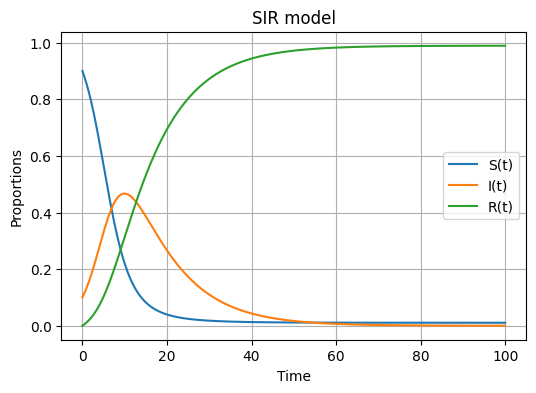

In [ ]:
# Exemplo SIR fixo
# import packages
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

#ODES
def SIR_model(y, t, beta, gamma):
    S, I, R = y

    dS = -beta*S*I
    dI = beta*S*I - gamma*I
    dR = gamma*I

    return ([dS, dI, dR])

#time vector
t = np.linspace(0, 100,1000)

#Initial condition
S0 = 0.9
I0 = 0.1
R0 = 0.0
beta = 0.45
gamma = 0.1
Ro = beta/(gamma)
print('R0 =',Ro)

#solution
solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))


#plot result
plt.figure(figsize=[6,4])
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

R0 = 1.8


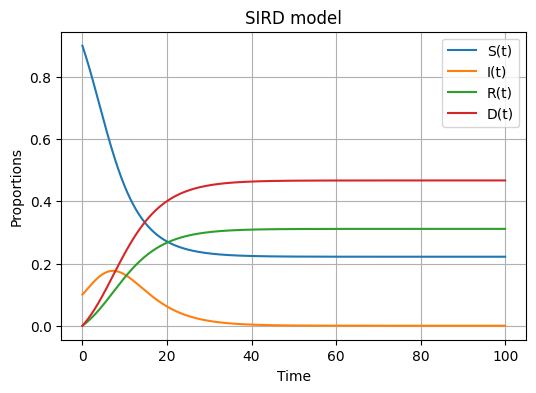

In [ ]:
# Exemplo SIRD fixo
# import packages
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

#ODES
def SIRD_model(y, t, beta, gamma, delta):            #adding death separately from recovery
    S, I, R, D = y

    dS = -beta*S*I
    dI = beta*S*I - gamma*I - delta*I
    dR = gamma*I
    dD = delta*I

    return ([dS, dI, dR, dD])

#time vector
t = np.linspace(0, 100,1000)

#Initial condition
S0 = 0.9
I0 = 0.1
R0 = 0.0
D0 = 0.0
beta = 0.45
gamma = 0.1
delta = 0.15
Ro = beta/(delta+gamma)
print('R0 =',Ro)

#solution
solution = scipy.integrate.odeint(SIRD_model, [S0, I0, R0, D0], t, args=(beta, gamma, delta))


#plot result
plt.figure(figsize=[6,4])
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.plot(t, solution[:, 3], label="D(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIRD model")
plt.show()

